In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import pickle

In [2]:
from sklearn.tree import DecisionTreeClassifier

In [3]:
with open('../../bases/census.pkl', 'rb') as f:
    X_census_treinamento, Y_census_treinamento, X_census_teste, Y_census_teste = pickle.load(f)

In [4]:
X_census_treinamento.shape, Y_census_treinamento.shape

((27676, 108), (27676,))

In [5]:
X_census_teste.shape, Y_census_teste.shape 

((4885, 108), (4885,))

In [6]:
arvore_census = DecisionTreeClassifier(criterion='entropy', random_state=0)
arvore_census.fit(X_census_treinamento, Y_census_treinamento)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [7]:
arvore_census.feature_importances_

array([1.73404897e-03, 4.37616310e-03, 4.86962235e-03, 0.00000000e+00,
       8.63224029e-03, 4.98138171e-03, 9.46084414e-03, 5.30163694e-03,
       0.00000000e+00, 9.08480993e-05, 3.50743849e-04, 4.25849318e-04,
       1.97527186e-04, 3.97209245e-04, 2.83423219e-04, 5.13857650e-04,
       1.47770295e-03, 2.97608630e-03, 1.97811221e-03, 0.00000000e+00,
       5.16016030e-03, 2.56449003e-03, 0.00000000e+00, 4.94692856e-04,
       3.28356150e-03, 2.21778948e-03, 1.50056936e-04, 1.93033085e-01,
       6.00105917e-04, 2.98924077e-03, 1.25642930e-03, 8.59916034e-04,
       1.49892920e-03, 6.65052912e-03, 0.00000000e+00, 6.80445750e-03,
       8.13719966e-03, 3.84556334e-03, 1.53879792e-03, 5.03087801e-03,
       4.59893669e-03, 0.00000000e+00, 7.40922371e-03, 4.32724721e-03,
       7.41644172e-03, 4.20904535e-03, 6.02535358e-03, 1.31173860e-03,
       2.82747168e-03, 9.23400613e-04, 8.65051890e-04, 1.35109744e-03,
       4.42837306e-03, 1.61182904e-03, 2.14603641e-03, 4.37891418e-03,
      

In [8]:
from sklearn import tree

In [9]:
previsoes = arvore_census.predict(X_census_teste)

In [10]:
previsoes

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' >50K'],
      dtype=object)

In [11]:
Y_census_teste

array([' <=50K', ' <=50K', ' <=50K', ..., ' <=50K', ' <=50K', ' <=50K'],
      dtype=object)

In [12]:
from sklearn.metrics import accuracy_score, classification_report

In [13]:
accuracy_score(Y_census_teste, previsoes)

0.8104401228249745

0.8104401228249745

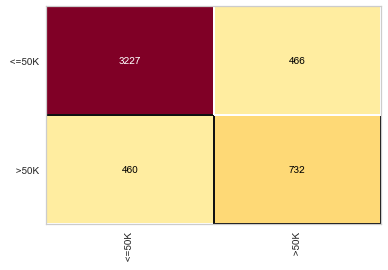

In [14]:
from yellowbrick.classifier import ConfusionMatrix
cm = ConfusionMatrix(arvore_census)
cm.fit(X_census_treinamento, Y_census_treinamento)
cm.score(X_census_teste, Y_census_teste)

In [15]:
print(classification_report(Y_census_teste, previsoes))

              precision    recall  f1-score   support

       <=50K       0.88      0.87      0.87      3693
        >50K       0.61      0.61      0.61      1192

    accuracy                           0.81      4885
   macro avg       0.74      0.74      0.74      4885
weighted avg       0.81      0.81      0.81      4885

